In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("raw_data.csv")
df.head()

Brand    Model                 Varient  Manufacturing_year  \
0      Nissan  Terrano    XV 110 DIESEL Manual                2014   
1  Volkswagen    Vento  HIGHLINE PETROL Manual                2014   
2      Maruti     Ritz        VXI GENUS Manual                2010   
3       Grand      i10   MAGNA 1.1 CRDI Manual                2015   
4       Swift    Dzire        VDI BS IV Manual                2014   

   Driven_kilometers    Fuel Numbers_of_owners   Price  
0              43866  Diesel         1st Owner  476199  
1              62625  Petrol         1st Owner  446899  
2              96362  Petrol         1st Owner  231399  
3              62491  Diesel         2nd Owner  312299  
4              96978  Diesel         1st Owner  416399

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               750 non-null    object
 1   Model               750 non-null    object
 2   Varient             750 non-null    object
 3   Manufacturing_year  750 non-null    int64 
 4   Driven_kilometers   750 non-null    int64 
 5   Fuel                750 non-null    object
 6   Numbers_of_owners   750 non-null    object
 7   Price               750 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 47.0+ KB


In [7]:
# Check Numerical status
df.describe()

Manufacturing_year  Driven_kilometers         Price
count          750.000000         750.000000  7.500000e+02
mean          2015.628000       55355.074667  5.916391e+05
std              2.171921       32855.633286  3.151213e+05
min           2009.000000        1991.000000  1.753990e+05
25%           2014.000000       31513.250000  3.997490e+05
50%           2015.000000       51233.500000  4.961490e+05
75%           2017.000000       73717.250000  6.811740e+05
max           2021.000000      238442.000000  2.250599e+06

In [8]:
# Check Missing value
df.isnull().sum()

Brand                 0
Model                 0
Varient               0
Manufacturing_year    0
Driven_kilometers     0
Fuel                  0
Numbers_of_owners     0
Price                 0
dtype: int64

# Data Preprocessing

In [10]:
df['Age'] = 2022 - df['Manufacturing_year']
df.drop('Manufacturing_year',axis=1,inplace = True)

In [11]:
df.rename(columns = {'Manufacturing_year':'Year','Driven_kilometers':'Driven_km','Numbers_of_owners':'Past_Owners'},inplace = True)

# Exploratory Data Analysis (EDA)

In [13]:
df.columns

Index(['Brand', 'Model', 'Varient', 'Driven_km', 'Fuel', 'Past_Owners',
       'Price', 'Age'],
      dtype='object')

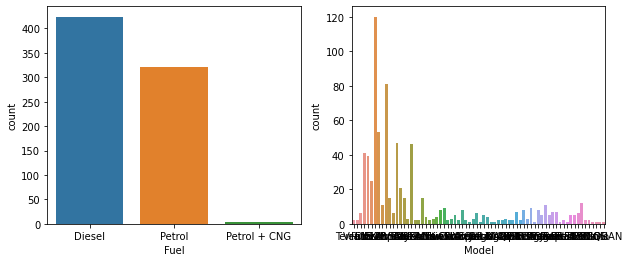

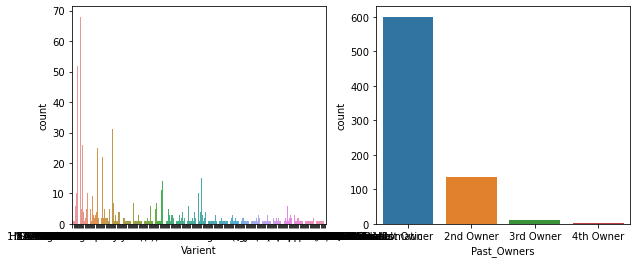

In [14]:
cat_cols = ['Fuel','Model','Varient','Past_Owners','Brand']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

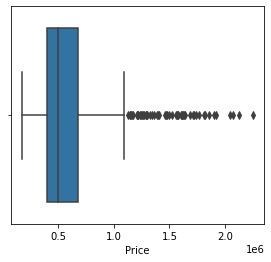

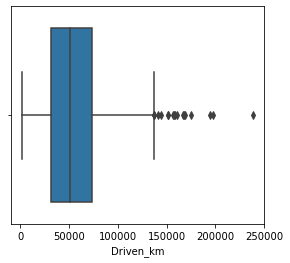

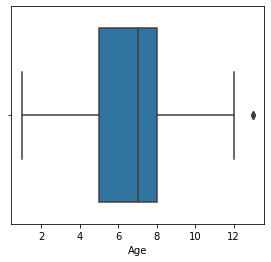

In [20]:
num_cols = ['Price','Driven_km','Age']
i=0
while i < 3:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
plt.show()

In [21]:
df[df['Price'] > df['Price'].quantile(0.99)]

Brand     Model                        Varient  Driven_km    Fuel  \
34          BMW     Swift           SDRIVE 20D Automatic      47517  Diesel   
194         CLA    Brezza       CLA 200 CDI SPORT Manual      43842  Diesel   
255       Skoda       i20        1.8 TSI LK AT Automatic      45280  Petrol   
355           5  Ecosport     520D LUXURY LINE Automatic      46477  Diesel   
496           5    Baleno     520D LUXURY LINE Automatic      80744  Diesel   
693        Audi       i10  30 TDI PREMIUM PLUS Automatic      32183  Diesel   
714      Tucson       K10     2WD AT GL DIESEL Automatic      29618  Diesel   
723  Volkswagen     Tiago         HIGHLINE A/T Automatic      74046  Diesel   

    Past_Owners    Price  Age  
34    1st Owner  1915799    5  
194   2nd Owner  2250599    5  
255   1st Owner  1897599    5  
355   1st Owner  1817799    9  
496   2nd Owner  2043799    7  
693   1st Owner  2072099    8  
714   1st Owner  1855899    4  
723   1st Owner  2124199    4

In [22]:
df[df['Driven_km'] > df['Driven_km'].quantile(0.99)]

Brand     Model                    Varient  Driven_km    Fuel  \
139     Elite  Ecosport       ASTA 1.4 CRDI Manual     169197  Diesel   
149  Mahindra    Baleno              W6 4X2 Manual     166990  Diesel   
220    Maruti     Dzire                 VXI Manual     160555  Petrol   
298    Toyota    SELTOS       3.0 AT 4X2 Automatic     197792  Diesel   
324    Toyota       i20  2.5 VX 7 STR BS IV Manual     238442  Diesel   
339     Honda      City         V MT DIESEL Manual     194550  Diesel   
374    Toyota       i20     SPORTIVO 4X2 MT Manual     175240  Diesel   
555    Maruti      Kwid                 VDI Manual     167528  Diesel   

    Past_Owners    Price  Age  
139   1st Owner   467499    8  
149   1st Owner   523699    8  
220   1st Owner   303899    8  
298   1st Owner  1221299    9  
324   1st Owner   757499    8  
339   2nd Owner   475699    7  
374   1st Owner  1299099    8  
555   1st Owner   334399    9

# Bivariate/Multi-Variate Analysis

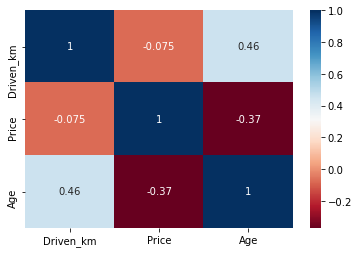

In [25]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [26]:
df.corr()['Price']

Driven_km   -0.075016
Price        1.000000
Age         -0.370081
Name: Price, dtype: float64

In [27]:
df.pivot_table(values='Price', index = 'Brand', columns= 'Fuel')

Fuel              Diesel        Petrol  Petrol + CNG
Brand                                               
3           1.580099e+06           NaN           NaN
5           1.692874e+06           NaN           NaN
A                    NaN  1.755490e+05           NaN
Alto                 NaN  3.283601e+05      358199.0
Audi        1.476259e+06           NaN           NaN
BMW         1.553749e+06           NaN           NaN
CLA         2.250599e+06           NaN           NaN
Celerio              NaN  4.765990e+05           NaN
Corolla     7.339990e+05  7.142490e+05      810599.0
E           1.372549e+06           NaN           NaN
Elite       5.246457e+05  5.617413e+05           NaN
Etios       3.734990e+05           NaN           NaN
Figo        3.965990e+05  5.533990e+05           NaN
Ford        6.181266e+05  6.992290e+05      817999.0
Grand       3.344212e+05  4.567566e+05           NaN
Honda       5.223490e+05  6.607961e+05           NaN
Hyundai     5.981535e+05  5.650428e+05           NaN
I10                  NaN  6.921490e+05           NaN
Innova      1.592799e+06  1.455899e+06           NaN
KIA                  NaN  1.059199e+06           NaN
MG                   NaN  1.732699e+06           NaN
Mahindra    1.000377e+06           NaN           NaN
Maruti      4.387168e+05  5.131490e+05           NaN
NEW                  NaN  5.249323e+05           NaN
New         6.224990e+05  4.897390e+05           NaN
Nissan      4.761990e+05           NaN           NaN
R                    NaN  3.407990e+05           NaN
Renault     4.771240e+05  3.538590e+05           NaN
S           7.012823e+05  4.526990e+05           NaN
Skoda                NaN  1.897599e+06           NaN
Swift       4.258169e+05  3.734323e+05           NaN
Tata        3.504990e+05  4.377657e+05           NaN
Toyota      9.640340e+05  7.898990e+05           NaN
Tucson      1.661532e+06           NaN           NaN
Vitara      7.340990e+05  1.079799e+06           NaN
Volkswagen  1.287699e+06  4.249823e+05           NaN
Zen                  NaN  2.059990e+05           NaN
i20         5.176990e+05           NaN           NaN

In [30]:
df.pivot_table(values='Price', index = 'Brand', columns= 'Varient')

Varient     1.0 ECOBOOST TITANIUM OPT Manual  1.0 RXT Manual  \
Brand                                                          
3                                        NaN             NaN   
5                                        NaN             NaN   
A                                        NaN             NaN   
Alto                                     NaN             NaN   
Audi                                     NaN             NaN   
BMW                                      NaN             NaN   
CLA                                      NaN             NaN   
Celerio                                  NaN             NaN   
Corolla                                  NaN             NaN   
E                                        NaN             NaN   
Elite                                    NaN             NaN   
Etios                                    NaN             NaN   
Figo                                     NaN             NaN   
Ford                                699299.0             NaN   
Grand                                    NaN             NaN   
Honda                                    NaN             NaN   
Hyundai                                  NaN             NaN   
I10                                      NaN             NaN   
Innova                                   NaN             NaN   
KIA                                      NaN             NaN   
MG                                       NaN             NaN   
Mahindra                                 NaN             NaN   
Maruti                                   NaN             NaN   
NEW                                      NaN             NaN   
New                                      NaN             NaN   
Nissan                                   NaN             NaN   
R                                        NaN             NaN   
Renault                                  NaN        394399.0   
S                                        NaN             NaN   
Skoda                                    NaN             NaN   
Swift                                    NaN             NaN   
Tata                                     NaN             NaN   
Toyota                                   NaN             NaN   
Tucson                                   NaN             NaN   
Vitara                                   NaN             NaN   
Volkswagen                               NaN             NaN   
Zen                                      NaN             NaN   
i20                                      NaN             NaN   

Varient     1.0 RXT Opt Manual  1.0 TURBO GDI SX+ AT Automatic  \
Brand                                                            
3                          NaN                             NaN   
5                          NaN                             NaN   
A                          NaN                             NaN   
Alto                       NaN                             NaN   
Audi                       NaN                             NaN   
BMW                        NaN                             NaN   
CLA                        NaN                             NaN   
Celerio                    NaN                             NaN   
Corolla                    NaN                             NaN   
E                          NaN                             NaN   
Elite                      NaN                             NaN   
Etios                      NaN                             NaN   
Figo                       NaN                             NaN   
Ford                       NaN                             NaN   
Grand                      NaN                             NaN   
Honda                      NaN                             NaN   
Hyundai                    NaN                       1075999.0   
I10                        NaN                             NaN   
Innova                     NaN                             NaN   
KIA                        NaN                       

# Data Preparation

# Creating Dummies for Categorical Features¶

In [31]:
df.drop(labels='Model',axis= 1, inplace = True)

In [32]:
df.head()

Brand                 Varient  Driven_km    Fuel Past_Owners   Price  \
0      Nissan    XV 110 DIESEL Manual      43866  Diesel   1st Owner  476199   
1  Volkswagen  HIGHLINE PETROL Manual      62625  Petrol   1st Owner  446899   
2      Maruti        VXI GENUS Manual      96362  Petrol   1st Owner  231399   
3       Grand   MAGNA 1.1 CRDI Manual      62491  Diesel   2nd Owner  312299   
4       Swift        VDI BS IV Manual      96978  Diesel   1st Owner  416399   

   Age  
0    8  
1    8  
2   12  
3    7  
4    8

In [33]:
df = pd.get_dummies(data = df,drop_first=True) 

In [34]:
df.head()

Driven_km   Price  Age  Brand_5  Brand_A  Brand_Alto  Brand_Audi  \
0      43866  476199    8        0        0           0           0   
1      62625  446899    8        0        0           0           0   
2      96362  231399   12        0        0           0           0   
3      62491  312299    7        0        0           0           0   
4      96978  416399    8        0        0           0           0   

   Brand_BMW  Brand_CLA  Brand_Celerio  ...  Varient_ZXI AMT Automatic  \
0          0          0              0  ...                          0   
1          0          0              0  ...                          0   
2          0          0              0  ...                          0   
3          0          0              0  ...                          0   
4          0          0              0  ...                          0   

   Varient_ZXI AT SHVS Automatic  Varient_ZXI Manual  \
0                              0                   0   
1                              0                   0   
2                              0                   0   
3                              0                   0   
4                              0                   0   

   Varient_ZXI OPT AMT Automatic  Varient_ZXI OPT Manual  Fuel_Petrol  \
0                              0                       0            0   
1                              0                       0            1   
2                              0                       0            1   
3                              0                       0            0   
4                              0                       0            0   

   Fuel_Petrol + CNG  Past_Owners_2nd Owner  Past_Owners_3rd Owner  \
0                  0                      0                      0   
1                  0                      0                      0   
2                  0                      0                      0   
3                  0                      1                      0   
4                  0                      0                      0   

   Past_Owners_4th Owner  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 274 columns]

# Train-Test Split

In [36]:
# Separating target variable and its features
y = df['Price']
X = df.drop('Price',axis=1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (600, 273)
x test:  (150, 273)
y train:  (600,)
y test:  (150,)


# Model Creation/Evaluation

### Applying regression models
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regression
- Gradient Boosting regressio

In [39]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [40]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

# Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.98
Test R2-score : -10383319404152.51
Train CV scores : [ 7.19747948e-01  7.00854497e-01  8.10450014e-01 -7.47286286e+11
  8.32316911e-01]
Train CV mean : -149457257199.18


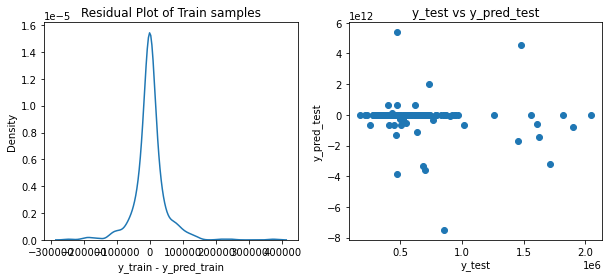

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.97
Test R2-score : 0.77
Train CV scores : [0.72000362 0.71260289 0.81403174 0.6618191  0.82647445]
Train CV mean : 0.75


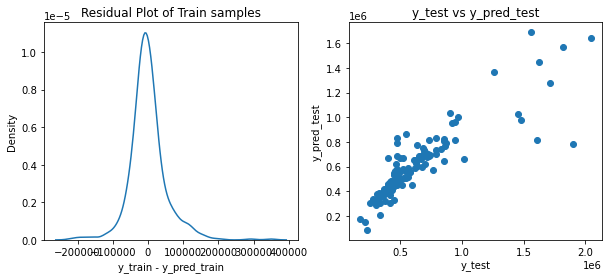

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.97
Test R2-score : 0.79
Train CV scores : [0.66419065 0.68749661 0.79003148 0.69322485 0.82714191]
Train CV mean : 0.73


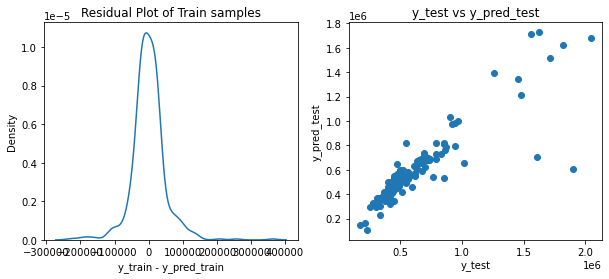

In [44]:
car_pred_model(ls_rs,"lasso.pkl")

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)


Train R2-score : 0.59
Test R2-score : 0.31
Train CV scores : [0.48474356 0.59421205 0.64632265 0.61769183 0.48631062]
Train CV mean : 0.57


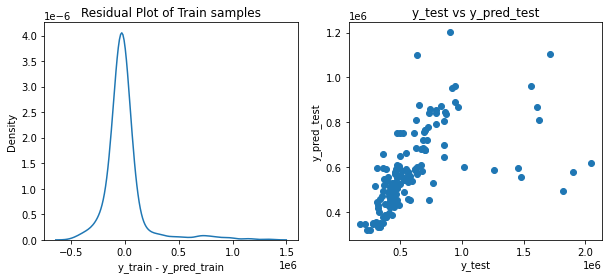

In [46]:
car_pred_model(rf_rs,'random_forest.pkl')

In [47]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=600)


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 0.99
Test R2-score : 0.75
Train CV scores : [0.65334644 0.64047437 0.81465045 0.70722251 0.78811911]
Train CV mean : 0.72


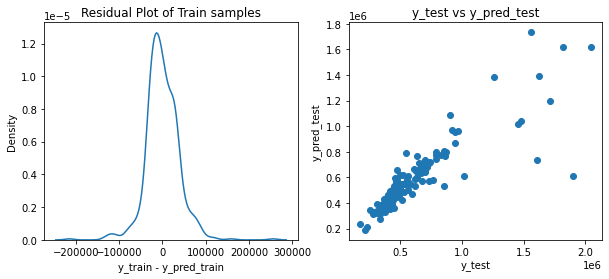

In [49]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [50]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

Model  R Squared(Train)  R Squared(Test)  \
0           LinearRegression              0.98    -1.038332e+13   
1                      Ridge              0.97     7.700000e-01   
2                      Lasso              0.97     7.900000e-01   
3      RandomForestRegressor              0.59     3.100000e-01   
4  GradientBoostingRegressor              0.99     7.500000e-01   

   CV score mean(Train)  
0         -1.494573e+11  
1          7.500000e-01  
2          7.300000e-01  
3          5.700000e-01  
4          7.200000e-01